# Prática 6 
## Analise dos dados
### Tarefa 4

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from LabIFSC import M

R = 98.7 #ohm, escala de 200 ohm
C = 108.8e-9 #F, escala de 200 nF
L = 45.3e-3 #H, escala de 200 mH
erro_R = 0.5+0.8e-2*98.7
erro_C = 2e-9+ 2.5e-2*abs(108.8e-9)
erro_L = 3e-3+ 2.5e-2*abs(45.3e-3)
f = 1/(2*np.pi*np.sqrt(L*C))

![](fotos/tarefa4_1.jpg)
![](fotos/tarefa4_2.jpg)
![](fotos/tarefa4_3.jpg)
![](fotos/tarefa4_4.jpg)
![](fotos/tarefa4_5.jpg)
![](fotos/tarefa4_6.jpg)

slope = 0.16359354162802306 +- 5.044603268134114e-09
intercept = -4.2307594744456765 +- 0.0001259993500440122


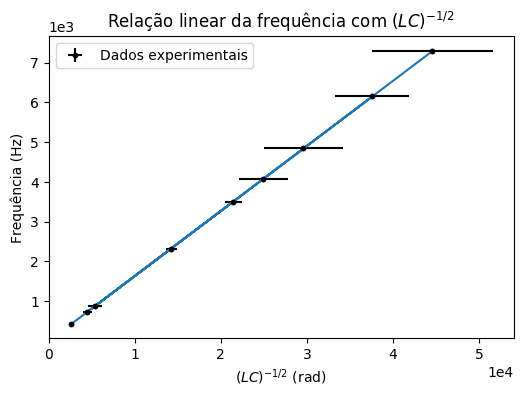

In [5]:
data_4 = np.loadtxt("data/tarefa4-ress.dat").T
l_4 = data_4[0]
c_4 = data_4[1]
f_4 = data_4[2]
erro_l4 = 3e-3+ 2.5e-2*abs(l_4)
erro_c4 = [0.01e-6, 0.1e-9, 0.1e-9, 0.01e-6, 0.1e-9,0.1e-9,0.01e-6,0.1e-9,0.1e-9] # ultima casa do display.
erro_f4 = f_4*0.005           
           
y_4 = f_4
x_4 = (l_4*c_4)**(-.5)
erro_x4 = -1/2*(l_4*c_4)**(-3/2)*(erro_c4*l_4+erro_l4*c_4)
lin_fit = lambda x,a,b:a*x+b

from scipy import stats
slope_4, intercept_4 , rrrrr,prob2,see = stats.linregress(x_4, y_4)
popt_4 = [slope_4, intercept_4]

mx = x_4.mean()
sx2 = ((x_4-mx)**2).sum()
sd_intercept = see * np.sqrt(1./len(x_4) + mx*mx/sx2)
sd_slope = see * np.sqrt(1./sx2)

print(f'slope = {slope_4} +- {sd_slope}')
print(f'intercept = {intercept_4} +- {sd_intercept}')

plt.figure(dpi=100)
plt.title(r"Relação linear da frequência com $(LC)^{-1/2}$")
plt.xlabel(r"$(LC)^{-1/2}$ (rad)")
plt.ylabel("Frequência (Hz)")
plt.ticklabel_format(style="sci", axis="both", scilimits=(0,0))
plt.errorbar(x_4, y_4, yerr=erro_f4, xerr=erro_x4, fmt='.', color="black", label="Dados experimentais")
plt.plot(x_4, y_4, '.k')
plt.plot(x_4, lin_fit(x_4, *popt_4))
plt.legend(loc=0)
plt.show()

### Conclusão da tarefa 4
> Para a mesma frequência de ressonância o modo XY mostrou uma reta com amplitudes diferentes.  
> E encontramos a relação linear 